# Datenvisualisierung mit Python

In diesem Teil geht es darum Daten mit Hilfe der Python Bilbiotheken **matplotlib** und **seaborn** zu visualisieren. Für einfache Beispiele können die Daten eingegeben werden. 

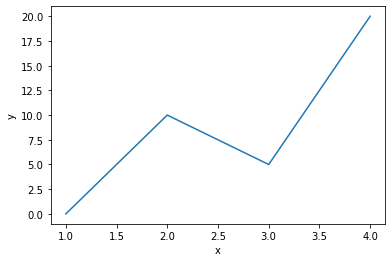

In [1]:
import matplotlib.pyplot as plt

#Daten
x = [1,2,3,4]
y = [0,10,5,20]

#Plot
plt.plot(x,y);
plt.xlabel("x");
plt.ylabel("y");

Wenn sich die Daten in einer Datei (z.B. Excel oder auch einer Textdatei z.B. im csv-Format) können diese mit Hilfe der Bilbiothek **pandas** eingelesen werden:

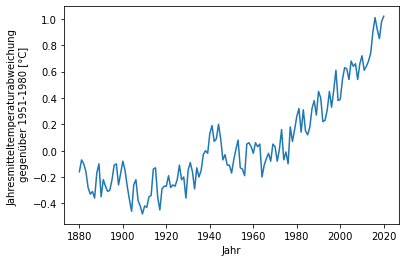

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#Daten
link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv"
Temp_NASA = pd.read_csv(link, header=1) # einlesen

#Plot
plt.plot(Temp_NASA["Year"],Temp_NASA["No_Smoothing"]);
plt.ylabel("Jahresmitteltemperaturabweichung \n gegenüber 1951-1980 [°C]");
plt.xlabel("Jahr");

Mit etwas mehr Codezeilen können komplexere und optisch ansprechendere plots erstellt werden:

<div class="alert alert-block alert-info">
Rechts auf (Click to show) klicken um Code einzublenden
</div>

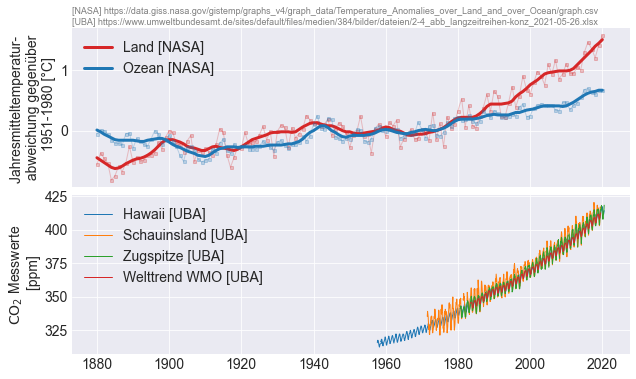

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Daten einlesen
# NASA
link_NASA = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv"
Temp_NASA2 = pd.read_csv(link_NASA, header=1); # einlesen

# UBA
link_UBA="https://www.umweltbundesamt.de/sites/default/files/medien/384/bilder/dateien/2-4_abb_langzeitreihen-konz_2021-05-26.xlsx"
CO2_Emission_UBA = pd.read_excel(link_UBA,sheet_name="Kohlendioxid-Daten",usecols=[0,1,2,3,4]); # einlesen
CO2_Emission_UBA.columns = ["Jahr","Mauna Loa, Hawaii","Schauinsland","Zugspitze","Welttrend WMO"];

# plot Einstellungen
plt.style.use('seaborn-darkgrid');
plt.rcParams['font.size'] = 14;

# Subplots einrichten
fig, (ax1,ax2) =plt.subplots(2,1, sharex=True, figsize=(10,6));
plt.subplots_adjust(hspace=0.05); # vertikalen Abstand zwischen Subplots reduzieren

# plot NASA Temperaturdifferenz
ax1.plot(Temp_NASA2["Year"],Temp_NASA2["Land_Annual"], ls="-", lw=1, marker="s", ms=3, color="tab:red", alpha=0.25);
ax1.plot(Temp_NASA2["Year"],Temp_NASA2["Lowess(5)"], lw=3,  color="tab:red", label="Land [NASA]");
ax1.plot(Temp_NASA2["Year"],Temp_NASA2["Ocean_Annual"], ls="-", lw=1, marker="s", ms=3, color="tab:blue", alpha=0.25);
ax1.plot(Temp_NASA2["Year"],Temp_NASA2["Lowess(5).1"], lw=3,  color="tab:blue", label="Ozean [NASA]");
ax1.set_ylabel("Jahresmitteltemperatur- \n abweichung gegenüber \n  1951-1980 [°C]");
ax1.legend(loc='upper left');

# plot UBA CO2
ax2.plot(CO2_Emission_UBA["Jahr"],CO2_Emission_UBA["Mauna Loa, Hawaii"], label="Hawaii [UBA]", lw=1);
ax2.plot(CO2_Emission_UBA["Jahr"],CO2_Emission_UBA["Schauinsland"], label="Schauinsland [UBA]", lw=1);
ax2.plot(CO2_Emission_UBA["Jahr"],CO2_Emission_UBA["Zugspitze"], label="Zugspitze [UBA]", lw=1);
ax2.plot(CO2_Emission_UBA["Jahr"],CO2_Emission_UBA["Welttrend WMO"], label="Welttrend WMO [UBA]", lw=1);
ax2.set_ylabel("$\mathrm{CO_2}$ Messwerte \n [ppm]");
ax2.legend(loc='upper left');

# Text mit Referenzlink hinzufuegen
ax1.text(0.0, 1.01, f'[NASA] {link_NASA}\n[UBA] {link_UBA}', transform=ax1.transAxes,fontsize=9,ha="left",va="bottom", color="gray");

Um Python zu Nutzen wird empfohlen die Umgebung mit **Jupyter Notebooks** zu verwenden. Dies kann Plattformübergreifend mit Hilfe von [Anaconda](https://www.anaconda.com/) installiert werden. 